# S5P TROPOMI Data Access Hub API Test - Pipeline 1

We will use this notebook to test the `sentinel_api_query` and a few other function included in the `s5p_no2_tools.py` package.

## Load toolkit functions

In [1]:
from s5p_no2_tools import sentinel_api_query, date_from_week, add_days, geometry_to_wkt, filter_swath_set, \
    get_place_boundingbox, show_colormap
import pandas as pd
import geopandas as gpd
from shapely import wkt

## Obtain target country GeoDataFrame

In [2]:
africa0_gdf = pd.read_pickle('data/africa0_gdf.pickle')

In [3]:
mozambique0 = africa0_gdf[africa0_gdf['name']=='Mozambique']

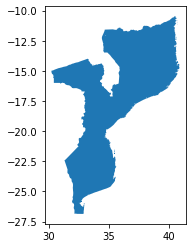

In [4]:
mozambique0.plot()

## Obtain bounding box

In [5]:
place0 = mozambique0
bbox = get_place_boundingbox(place_gdf=place0, buffer=2)

## Obtain WKT string for API query

In [6]:
polygon = geometry_to_wkt(place_gdf=bbox)

polygon

'POLYGON ((28.2176580907263528 -28.8683699679332229, 28.2176580907263528 -8.4712495800000003, 42.8393058799999977 -8.4712495800000003, 42.8393058799999977 -28.8683699679332229, 28.2176580907263528 -28.8683699679332229))'

## Compose API query dictionary

In [7]:
startDate, endDate = add_days(start=date_from_week(weekstring='2020-W01'),numDays=21)
productType='L2__NO2___'
processingLevel='L2'
platformName='Sentinel-5'
processingMode='Offline'
startPage=0
numRows=50
dhus_url='https://s5phub.copernicus.eu/'
username='s5pguest'
password='s5pguest'

query_dict = {
    'startDate': startDate,
    'endDate': endDate,
    'productType': productType,
    'processingLevel': processingLevel,
    'platformName': platformName,
    'processingMode': processingMode,
    'polygon': polygon,
    'startPage': startPage,
    'numRows': numRows,
    'dhus_url': dhus_url,
    'username': username,
    'password': password
}

query_dict

{'startDate': '2020-01-06',
 'endDate': '2020-01-27',
 'productType': 'L2__NO2___',
 'processingLevel': 'L2',
 'platformName': 'Sentinel-5',
 'processingMode': 'Offline',
 'polygon': 'POLYGON ((28.2176580907263528 -28.8683699679332229, 28.2176580907263528 -8.4712495800000003, 42.8393058799999977 -8.4712495800000003, 42.8393058799999977 -28.8683699679332229, 28.2176580907263528 -28.8683699679332229))',
 'startPage': 0,
 'numRows': 50,
 'dhus_url': 'https://s5phub.copernicus.eu/',
 'username': 's5pguest',
 'password': 's5pguest'}

## Send query dictionary to Data Access Hub API

In [8]:
W01_2020_gdf = sentinel_api_query(query_dict)

Delaying for 10 seconds...
query: ( footprint:"Intersects(POLYGON ((28.2176580907263528 -28.8683699679332229, 28.2176580907263528 -8.4712495800000003, 42.8393058799999977 -8.4712495800000003, 42.8393058799999977 -28.8683699679332229, 28.2176580907263528 -28.8683699679332229)))") AND     ( beginPosition:[2020-01-06T00:00:00.000Z TO 2020-01-27T23:59:59.999Z] AND     endPosition:[2020-01-06T00:00:00.000Z TO 2020-01-27T23:59:59.999Z] )     AND ( (platformname:Sentinel-5 AND producttype:L2__NO2___     AND processinglevel:L2 AND processingmode:Offline))
quoted: %28+footprint%3A%22Intersects%28POLYGON+%28%2828.2176580907263528+-28.8683699679332229%2C+28.2176580907263528+-8.4712495800000003%2C+42.8393058799999977+-8.4712495800000003%2C+42.8393058799999977+-28.8683699679332229%2C+28.2176580907263528+-28.8683699679332229%29%29%29%22%29+AND+++++%28+beginPosition%3A%5B2020-01-06T00%3A00%3A00.000Z+TO+2020-01-27T23%3A59%3A59.999Z%5D+AND+++++endPosition%3A%5B2020-01-06T00%3A00%3A00.000Z+TO+2020-01-27




OrderedDict([('title', 'S5P_OFFL_L2__NO2____20200108T103018_20200108T121148_11592_01_010302_20200110T031800'), ('link', [OrderedDict([('@href', "https://s5phub.copernicus.eu/dhus/odata/v1/Products('3419f00b-13f0-46cd-a436-11991d4f8c63')/$value")]), OrderedDict([('@rel', 'alternative'), ('@href', "https://s5phub.copernicus.eu/dhus/odata/v1/Products('3419f00b-13f0-46cd-a436-11991d4f8c63')/")]), OrderedDict([('@rel', 'icon'), ('@href', "https://s5phub.copernicus.eu/dhus/odata/v1/Products('3419f00b-13f0-46cd-a436-11991d4f8c63')/Products('Quicklook')/$value")])]), ('id', '3419f00b-13f0-46cd-a436-11991d4f8c63'), ('summary', 'Date: 2020-01-08T10:51:52Z, Instrument: TROPOMI, Mode: , Satellite: Sentinel-5 Precursor, Size: 436.72 MB'), ('date', [OrderedDict([('@name', 'ingestiondate'), ('#text', '2020-01-15T21:35:21.563Z')]), OrderedDict([('@name', 'beginposition'), ('#text', '2020-01-08T10:51:52Z')]), OrderedDict([('@name', 'endposition'), ('#text', '2020-01-08T11:50:16Z')])]), ('int', Order

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [9]:
len(W01_2020_gdf)

41

## Reduce the number of swaths, remove swaths that will overlap in target country

In [10]:
W01_2020_gdf.crs = place0.crs

In [11]:
sjoin_gdf = filter_swath_set(swath_set_gdf = W01_2020_gdf, place_gdf=bbox)

In [12]:
len(sjoin_gdf)

7

In [13]:
sjoin_gdf

,beginposition,crs,downloadurl,endposition,filename,footprint,format,identifier,ingestiondate,instrumentname,...,processingmodeabbreviation,processorversion,producttype,producttypedescription,revisionnumber,size,uuid,startdate,enddate,geometry
0,2020-01-14 10:39:28,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2020-01-14 11:37:52,S5P_OFFL_L2__NO2____20200114T101754_20200114T1...,"MULTIPOLYGON (((-180 -85.05115, -85.8669061591...",netCDF,S5P_OFFL_L2__NO2____20200114T101754_20200114T1...,2020-01-23T17:11:05.755Z,TROPOspheric Monitoring Instrument,...,OFFL,010302,L2__NO2___,Nitrogen Dioxide,01,435.34 MB,a063639a-2244-4e9c-a28f-5e39547bac72,2020-01-14,2020-01-14,"POLYGON ((28.21766 -28.86837, 42.83931 -28.868..."
1,2020-01-13 10:58:27,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2020-01-13 11:56:50,S5P_OFFL_L2__NO2____20200113T103652_20200113T1...,"MULTIPOLYGON (((-180 -85.05115, -90.3030289810...",netCDF,S5P_OFFL_L2__NO2____20200113T103652_20200113T1...,2020-01-22T17:07:35.099Z,TROPOspheric Monitoring Instrument,...,OFFL,010302,L2__NO2___,Nitrogen Dioxide,01,437.59 MB,2e753a34-462b-4918-92e3-95d76c66a502,2020-01-13,2020-01-13,"POLYGON ((28.21766 -28.86837, 42.83931 -28.868..."
2,2020-01-09 10:32:53,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2020-01-09 11:31:16,S5P_OFFL_L2__NO2____20200109T101118_20200109T1...,"MULTIPOLYGON (((-180 -85.05115, -83.3594186392...",netCDF,S5P_OFFL_L2__NO2____20200109T101118_20200109T1...,2020-01-18T21:37:01.804Z,TROPOspheric Monitoring Instrument,...,OFFL,010302,L2__NO2___,Nitrogen Dioxide,01,432.71 MB,3dcf736d-6a59-41fa-81c8-655a378b4d07,2020-01-09,2020-01-09,"POLYGON ((28.21766 -28.86837, 42.83931 -28.868..."
3,2020-01-08 10:51:52,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2020-01-08 11:50:16,S5P_OFFL_L2__NO2____20200108T103018_20200108T1...,"MULTIPOLYGON (((-180 -85.05115, -88.2398482430...",netCDF,S5P_OFFL_L2__NO2____20200108T103018_20200108T1...,2020-01-15T21:35:21.563Z,TROPOspheric Monitoring Instrument,...,OFFL,010302,L2__NO2___,Nitrogen Dioxide,01,436.72 MB,3419f00b-13f0-46cd-a436-11991d4f8c63,2020-01-08,2020-01-08,"POLYGON ((28.21766 -28.86837, 42.83931 -28.868..."
4,2020-01-25 10:33:49,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2020-01-25 11:26:06,S5P_OFFL_L2__NO2____20200125T101215_20200125T1...,"MULTIPOLYGON (((-180 -85.05115, -84.1288777635...",netCDF,S5P_OFFL_L2__NO2____20200125T101215_20200125T1...,2020-02-03T22:11:56.637Z,TROPOspheric Monitoring Instrument,...,OFFL,010302,L2__NO2___,Nitrogen Dioxide,01,411.41 MB,d3ec7d56-84cc-4cc7-ab5e-1d792145339d,2020-01-25,2020-01-25,"POLYGON ((28.21766 -28.86837, 42.83931 -28.868..."
5,2020-01-24 10:52:48,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2020-01-24 11:45:04,S5P_OFFL_L2__NO2____20200124T103113_20200124T1...,"MULTIPOLYGON (((-180 -85.05115, -88.9761062852...",netCDF,S5P_OFFL_L2__NO2____20200124T103113_20200124T1...,2020-02-02T22:11:00.615Z,TROPOspheric Monitoring Instrument,...,OFFL,010302,L2__NO2___,Nitrogen Dioxide,01,415.37 MB,18141ef2-b060-4219-9020-e79e6e8d8c35,2020-01-24,2020-01-24,"POLYGON ((28.21766 -28.86837, 42.83931 -28.868..."
6,2020-01-19 10:46:06,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2020-01-19 11:44:30,S5P_OFFL_L2__NO2____20200119T102432_20200119T1...,"MULTIPOLYGON (((-180 -85.05115, -86.6012063368...",netCDF,S5P_OFFL_L2__NO2____20200119T102432_20200119T1...,2020-01-28T17:39:26.047Z,TROPOspheric Monitoring Instrument,...,OFFL,010302,L2__NO2___,Nitrogen Dioxide,01,436.35 MB,a98ebfb2-08a3-47ed-872a-c545bdddcd8c,2020-01-19,2020-01-19,"POLYGON ((28.21766 -28.86837, 42.83931 -28.868..."


## Display the satellite paths in Folium

In [14]:
sjoin_gdf['footprint'] = sjoin_gdf['footprint'].astype(str).apply(wkt.loads)

In [15]:
my_gdf = gpd.GeoDataFrame(sjoin_gdf, geometry='footprint')

In [16]:
my_gdf

,beginposition,crs,downloadurl,endposition,filename,footprint,format,identifier,ingestiondate,instrumentname,...,processingmodeabbreviation,processorversion,producttype,producttypedescription,revisionnumber,size,uuid,startdate,enddate,geometry
0,2020-01-14 10:39:28,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2020-01-14 11:37:52,S5P_OFFL_L2__NO2____20200114T101754_20200114T1...,"MULTIPOLYGON (((-180.00000 -85.05115, -85.8669...",netCDF,S5P_OFFL_L2__NO2____20200114T101754_20200114T1...,2020-01-23T17:11:05.755Z,TROPOspheric Monitoring Instrument,...,OFFL,010302,L2__NO2___,Nitrogen Dioxide,01,435.34 MB,a063639a-2244-4e9c-a28f-5e39547bac72,2020-01-14,2020-01-14,"POLYGON ((28.21766 -28.86837, 42.83931 -28.868..."
1,2020-01-13 10:58:27,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2020-01-13 11:56:50,S5P_OFFL_L2__NO2____20200113T103652_20200113T1...,"MULTIPOLYGON (((-180.00000 -85.05115, -90.3030...",netCDF,S5P_OFFL_L2__NO2____20200113T103652_20200113T1...,2020-01-22T17:07:35.099Z,TROPOspheric Monitoring Instrument,...,OFFL,010302,L2__NO2___,Nitrogen Dioxide,01,437.59 MB,2e753a34-462b-4918-92e3-95d76c66a502,2020-01-13,2020-01-13,"POLYGON ((28.21766 -28.86837, 42.83931 -28.868..."
2,2020-01-09 10:32:53,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2020-01-09 11:31:16,S5P_OFFL_L2__NO2____20200109T101118_20200109T1...,"MULTIPOLYGON (((-180.00000 -85.05115, -83.3594...",netCDF,S5P_OFFL_L2__NO2____20200109T101118_20200109T1...,2020-01-18T21:37:01.804Z,TROPOspheric Monitoring Instrument,...,OFFL,010302,L2__NO2___,Nitrogen Dioxide,01,432.71 MB,3dcf736d-6a59-41fa-81c8-655a378b4d07,2020-01-09,2020-01-09,"POLYGON ((28.21766 -28.86837, 42.83931 -28.868..."
3,2020-01-08 10:51:52,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2020-01-08 11:50:16,S5P_OFFL_L2__NO2____20200108T103018_20200108T1...,"MULTIPOLYGON (((-180.00000 -85.05115, -88.2398...",netCDF,S5P_OFFL_L2__NO2____20200108T103018_20200108T1...,2020-01-15T21:35:21.563Z,TROPOspheric Monitoring Instrument,...,OFFL,010302,L2__NO2___,Nitrogen Dioxide,01,436.72 MB,3419f00b-13f0-46cd-a436-11991d4f8c63,2020-01-08,2020-01-08,"POLYGON ((28.21766 -28.86837, 42.83931 -28.868..."
4,2020-01-25 10:33:49,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2020-01-25 11:26:06,S5P_OFFL_L2__NO2____20200125T101215_20200125T1...,"MULTIPOLYGON (((-180.00000 -85.05115, -84.1288...",netCDF,S5P_OFFL_L2__NO2____20200125T101215_20200125T1...,2020-02-03T22:11:56.637Z,TROPOspheric Monitoring Instrument,...,OFFL,010302,L2__NO2___,Nitrogen Dioxide,01,411.41 MB,d3ec7d56-84cc-4cc7-ab5e-1d792145339d,2020-01-25,2020-01-25,"POLYGON ((28.21766 -28.86837, 42.83931 -28.868..."
5,2020-01-24 10:52:48,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2020-01-24 11:45:04,S5P_OFFL_L2__NO2____20200124T103113_20200124T1...,"MULTIPOLYGON (((-180.00000 -85.05115, -88.9761...",netCDF,S5P_OFFL_L2__NO2____20200124T103113_20200124T1...,2020-02-02T22:11:00.615Z,TROPOspheric Monitoring Instrument,...,OFFL,010302,L2__NO2___,Nitrogen Dioxide,01,415.37 MB,18141ef2-b060-4219-9020-e79e6e8d8c35,2020-01-24,2020-01-24,"POLYGON ((28.21766 -28.86837, 42.83931 -28.868..."
6,2020-01-19 10:46:06,epsg:4326,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,2020-01-19 11:44:30,S5P_OFFL_L2__NO2____20200119T102432_20200119T1...,"MULTIPOLYGON (((-180.00000 -85.05115, -86.6012...",netCDF,S5P_OFFL_L2__NO2____20200119T102432_20200119T1...,2020-01-28T17:39:26.047Z,TROPOspheric Monitoring Instrument,...,OFFL,010302,L2__NO2___,Nitrogen Dioxide,01,436.35 MB,a98ebfb2-08a3-47ed-872a-c545bdddcd8c,2020-01-19,2020-01-19,"POLYGON ((28.21766 -28.86837, 42.83931 -28.868..."


In [17]:
import folium

In [18]:
lat = place0.centroid.y
lon = place0.centroid.x

In [19]:
mymap = folium.Map(location=(lat,lon), zoom_start=4)
style = {'fillColor': '#00000000', 'color': 'black'}
for i in range(0, len(my_gdf)):
    folium.GeoJson(bbox.loc[0,'geometry'], style_function=lambda x: style).add_to(mymap)
    tooltip = my_gdf.loc[1, 'startdate']
    folium.GeoJson(my_gdf.loc[0,'footprint'],style_function=lambda x: style, tooltip=tooltip).add_to(mymap)
mymap

## Test color map display

You can use this colormap display to determine the best colormap for NO2 data display.

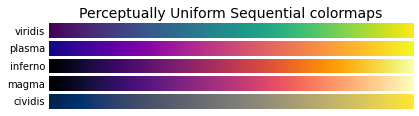

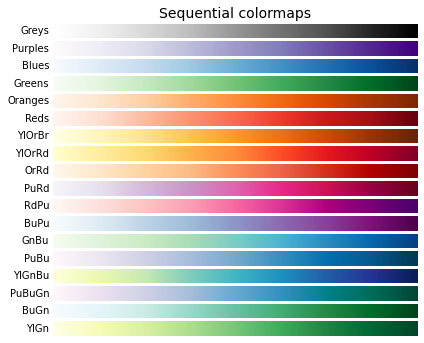

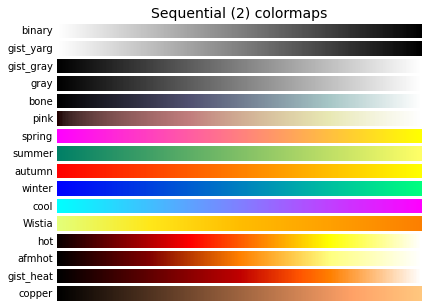

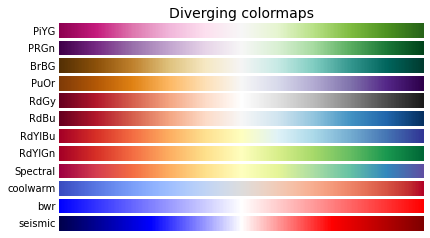

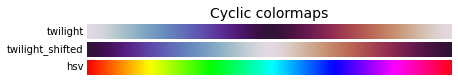

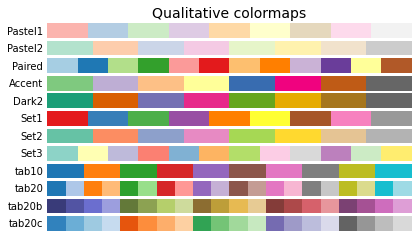

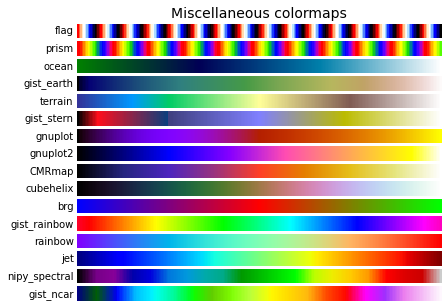

True

In [20]:
show_colormap()

## References

1. SentinelSat: https://github.com/sentinelsat/sentinelsat/issues/269
2. Command Line Tool: https://github.com/bilelomrani1/s5p-tools
3. Omrani, Hichem, et al. "Spatio-temporal data on the air pollutant nitrogen dioxide derived from Sentinel satellite for France." Data in Brief (2020): 105089.